## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

# L1
def build_mlp_11(input_shape, output_units=10, num_neurous=[512, 256, 128], l1_ratio=0.001):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurous):
        if i==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1(l1_ratio))(x)

    out = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
     
    return model

# L2
def build_mlp_12(input_shape, output_units=10, num_neurous=[512, 256, 128], l2_ratio=0.001):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurous):
        if i==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l2(l2_ratio))(x)

    out = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
     
    return model

# L1_12
def build_mlp_11_l2(input_shape, output_units=10, num_neurous=[512, 256, 128], l1_ratio=0.001, l2_ratio=0.001):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurous):
        if i==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1),
                                  kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(x)

    out = keras.layers.Dense(units=10, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
     
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE= 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
RATIO =[0.01,0.0001]

In [7]:
# l1
results_l1 = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in RATIO:
    keras.backend.clear_session()
    print('Regulizer L1 :{}'.format(str(regulizer_ratio)))
    model = build_mlp_11(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = 'l1-%s'% str(regulizer_ratio)
    results_l1[name_tag] = {'train_loss': train_loss, 'valid_loss': valid_loss,
                            'train_acc': train_acc, 'valid_acc': valid_acc}
    
# l2
results_l2 = {}

for regulizer_ratio in RATIO:
    keras.backend.clear_session()
    print('Regulizer L2 :{}'.format(str(regulizer_ratio)))
    model = build_mlp_12(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = 'l2-%s'% str(regulizer_ratio)
    results_l2[name_tag] = {'train_loss': train_loss, 'valid_loss': valid_loss,
                            'train_acc': train_acc, 'valid_acc': valid_acc}

Regulizer L1 :0.01
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

50000/50000 [==============================] - 12s 244us/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.4626 - accuracy: 0.0976 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.4626 - accuracy: 0.0955 - val_loss: 2.4624 - val_accuracy: 0.1000
Regulizer L1 :0.0001
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________________________

50000/50000 [==============================] - 9s 188us/step - loss: 2.8290 - accuracy: 0.6185 - val_loss: 3.0927 - val_accuracy: 0.5224
Epoch 46/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.7834 - accuracy: 0.6207 - val_loss: 3.0421 - val_accuracy: 0.5252
Epoch 47/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.7518 - accuracy: 0.6220 - val_loss: 3.0577 - val_accuracy: 0.5118
Epoch 48/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.7062 - accuracy: 0.6246 - val_loss: 2.9604 - val_accuracy: 0.5283
Epoch 49/50
50000/50000 [==============================] - 10s 193us/step - loss: 2.6707 - accuracy: 0.6256 - val_loss: 3.0509 - val_accuracy: 0.5014
Epoch 50/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.6383 - accuracy: 0.6279 - val_loss: 2.9189 - val_accuracy: 0.5230
Regulizer L2 :0.01
Model: "model_1"
_________________________________________________________________
Layer (type) 

50000/50000 [==============================] - 9s 186us/step - loss: 1.6463 - accuracy: 0.5166 - val_loss: 1.7425 - val_accuracy: 0.4719
Epoch 43/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.6391 - accuracy: 0.5172 - val_loss: 1.6803 - val_accuracy: 0.5029
Epoch 44/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.6332 - accuracy: 0.5172 - val_loss: 1.6860 - val_accuracy: 0.4930
Epoch 45/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6303 - accuracy: 0.5175 - val_loss: 1.6754 - val_accuracy: 0.4989
Epoch 46/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.6260 - accuracy: 0.5199 - val_loss: 1.6768 - val_accuracy: 0.4981
Epoch 47/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.6217 - accuracy: 0.5234 - val_loss: 1.6706 - val_accuracy: 0.5044
Epoch 48/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.6175 - accuracy: 0.5214 - val_loss:

Epoch 40/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.1442 - accuracy: 0.6503 - val_loss: 1.5337 - val_accuracy: 0.5190
Epoch 41/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.1323 - accuracy: 0.6520 - val_loss: 1.5584 - val_accuracy: 0.5143
Epoch 42/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.1194 - accuracy: 0.6562 - val_loss: 1.5622 - val_accuracy: 0.5160
Epoch 43/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.1091 - accuracy: 0.6599 - val_loss: 1.5190 - val_accuracy: 0.5265
Epoch 44/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0959 - accuracy: 0.6645 - val_loss: 1.4772 - val_accuracy: 0.5375
Epoch 45/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.0816 - accuracy: 0.6706 - val_loss: 1.4956 - val_accuracy: 0.5334
Epoch 46/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.0694 - accuracy: 0.67

In [9]:
#L1_L2
results_l1_l2 = {}

for regulizer_ratio in RATIO:
    keras.backend.clear_session()
    print('Regulizer L1 :{} & egulizer L2:{}'.format(str(regulizer_ratio), str(regulizer_ratio)))
    model = build_mlp_11_l2(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio, l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = 'l1-%s'% str(regulizer_ratio)+ ' l2-%s'% str(regulizer_ratio)
    results_l1_l2[name_tag] = {'train_loss': train_loss, 'valid_loss': valid_loss,
                            'train_acc': train_acc, 'valid_acc': valid_acc}

Regulizer L1 :0.01 & egulizer L2:0.01
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

50000/50000 [==============================] - 12s 248us/step - loss: 2.4614 - accuracy: 0.0984 - val_loss: 2.4613 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 249us/step - loss: 2.4614 - accuracy: 0.0988 - val_loss: 2.4613 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.4614 - accuracy: 0.0969 - val_loss: 2.4614 - val_accuracy: 0.1000
Regulizer L1 :0.0001 & egulizer L2:0.0001
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________

50000/50000 [==============================] - 12s 236us/step - loss: 2.8046 - accuracy: 0.6155 - val_loss: 3.2319 - val_accuracy: 0.4852
Epoch 46/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.7654 - accuracy: 0.6173 - val_loss: 3.1132 - val_accuracy: 0.4877
Epoch 47/50
50000/50000 [==============================] - 12s 231us/step - loss: 2.7248 - accuracy: 0.6198 - val_loss: 2.9811 - val_accuracy: 0.5270
Epoch 48/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.6858 - accuracy: 0.6208 - val_loss: 2.9577 - val_accuracy: 0.5177
Epoch 49/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.6461 - accuracy: 0.6219 - val_loss: 2.8989 - val_accuracy: 0.5253
Epoch 50/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.6068 - accuracy: 0.6269 - val_loss: 2.9157 - val_accuracy: 0.5130


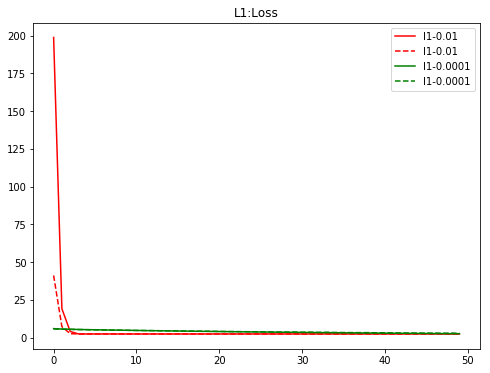

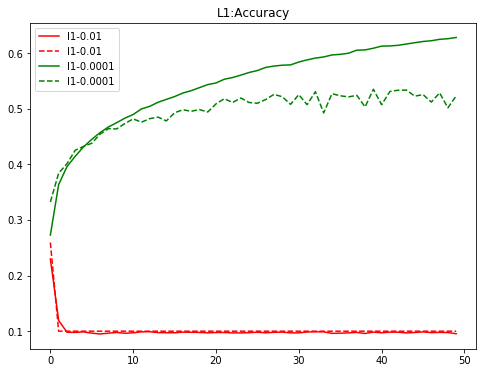

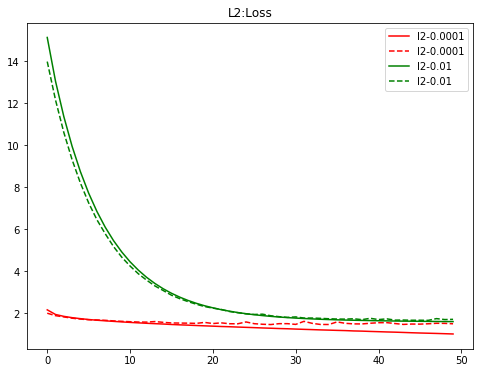

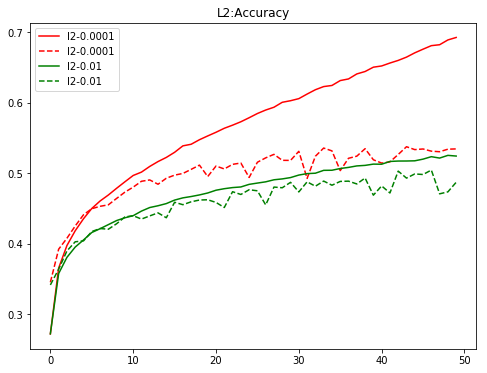

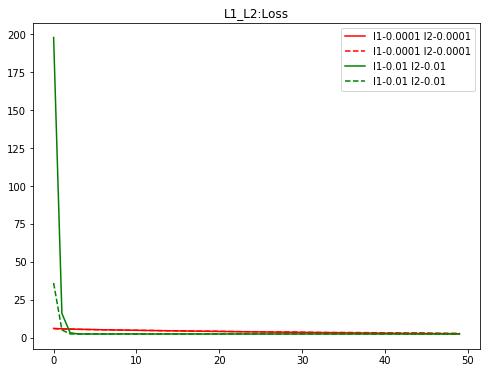

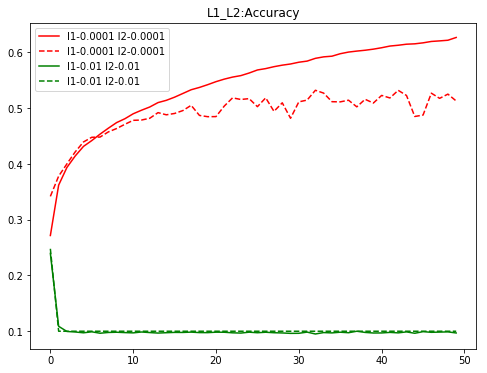

In [15]:
# l1
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k','gray','purple','orange']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train_loss'])), results_l1[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid_loss'])), results_l1[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title('L1:Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1.keys()):
    plt.plot(range(len(results_l1[cond]['train_acc'])), results_l1[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1[cond]['valid_acc'])), results_l1[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title('L1:Accuracy')
plt.legend()
plt.show()

# l2
"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l2.keys()):
    plt.plot(range(len(results_l2[cond]['train_loss'])), results_l2[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l2[cond]['valid_loss'])), results_l2[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title('L2:Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l2.keys()):
    plt.plot(range(len(results_l2[cond]['train_acc'])), results_l2[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l2[cond]['valid_acc'])), results_l2[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title('L2:Accuracy')
plt.legend()
plt.show()

# l1_l2
"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1_l2.keys()):
    plt.plot(range(len(results_l1_l2[cond]['train_loss'])), results_l1_l2[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1_l2[cond]['valid_loss'])), results_l1_l2[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title('L1_L2:Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_l1_l2.keys()):
    plt.plot(range(len(results_l1_l2[cond]['train_acc'])), results_l1_l2[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_l1_l2[cond]['valid_acc'])), results_l1_l2[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title('L1_L2:Accuracy')
plt.legend()
plt.show()